# DataFrame Generation and Analysis for Comparison

In [185]:
from TCSPC import *
plt.rcParams['figure.constrained_layout.use'] = True

In [2]:
EGFP = Phasor([0.497,0.503],[2.43,3.07])

### Update on Phasor.generate_df() 11/03/2024

OptimizeResult from `scipy.optimize.root()` is used to generate df\
It includes success, nfev, and parameter results \
Access the `df` using `EGFP.df`\
Background is removed in EGFP.phasor_data

### Update on Simulation.val_df()

In [3]:
def repeat_sim_n(sim,n_photon_arr = np.logspace(4,9,20).astype(int),n_repeat = 100):
    '''Store results of simulations for Simulation object sim 
    of n_photon in n_photon_arr (default  np.logspace(6,10,100).astype(int))
    Input:
    sim            Simulation Object
    n_photon_arr   Number of photons (collected in total) array
    n_repeat       Number of repeats in simulation
    '''
    sim.y_list = np.zeros((len(n_photon_arr),n_repeat,380)) #array to store 100 simulations of time domain data for each n_photon
    sim.y_bg_list= np.zeros((len(n_photon_arr),n_repeat,380))
    sim.phasor_list = np.zeros((len(n_photon_arr),n_repeat,380),dtype = complex) #array to store phasors from simulations of different n_photon
    sim.phasor_bg_list = np.zeros((len(n_photon_arr),n_repeat,380),dtype = complex) #with background
    for i in range(len(n_photon_arr)):
        sim.n_photon = n_photon_arr[i] #set n_photon
        sim.repeat_sim(n_repeat) #generate 100 simulations
        sim.y_list[i] = sim.sim_data- sim.run_time*sim.bg/sim.n_bins#store 100 decays, no bg
        sim.y_bg_list[i] = sim.sim_data  #store 100 decays, with bg
        sim.phasor_list[i] = sim.phasor_data #store 100 phasors, no bg
        w,sim.phasor_bg_list[i] = sim.phasor_fft(sim.sim_data) #phasor with backhround

In [9]:
#repeat_sim_n(EGFP) #access the data from EGFP.y_list, EGFP.y_bg_list, EGFP.phasor_list and EGFP.phasor_bg_list

In [4]:
#np.save('df/EGFP_data',[EGFP.y_list,EGFP.y_bg_list,EGFP.phasor_list,EGFP.phasor_bg_list])
EGFP.y_list,EGFP.y_bg_list,EGFP.phasor_list,EGFP.phasor_bg_list = np.load('df/EGFP_data.npy')
EGFP.y_list=EGFP.y_list.astype(int)
EGFP.y_bg_list=EGFP.y_bg_list.astype(int)

/var/folders/vh/bwtbn9cn1xlbm74kxlygt5b80000gn/T/ipykernel_745/2602227171.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  EGFP.y_list=EGFP.y_list.astype(int)
/var/folders/vh/bwtbn9cn1xlbm74kxlygt5b80000gn/T/ipykernel_745/2602227171.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  EGFP.y_bg_list=EGFP.y_bg_list.astype(int)


### Different Cases of Fitting and Phasor Method:
#### Fit
- `bg            `: with background, no rescale
- `no_bg         `: without background, no rescale
- `rescale       `: with background and rescale
- `

In [6]:
n_photon_arr = np.logspace(4,9,20)
# df_list = []   #mle
# df_ls_list = [] #least squares
# df_p_list = [] #phasor
# N=2 #N components
# for i in range(len(n_photon_arr)):
#     df_bg = EGFP.val_df(N,sim_data=EGFP.y_bg_list[i])
#     df_no_bg = EGFP.val_df(N,sim_data=EGFP.y_list[i],bg=False)
#     df_rescale= EGFP.val_df(N,sim_data=EGFP.y_list[i],rescale = True)
#     df_no_bg_rescale= EGFP.val_df(N,sim_data=EGFP.y_list[i],r=30,rescale = True,bg=False)
#     df_list.append([df_bg,df_no_bg,df_rescale,df_no_bg_rescale])

# for i in range(len(n_photon_arr)):
#     df_bg = EGFP.val_df(N,resid_func = LS_deviance_residual,sim_data=EGFP.y_bg_list[i])
#     df_no_bg = EGFP.val_df(N,resid_func = LS_deviance_residual,sim_data=EGFP.y_list[i],bg=False)
#     df_rescale= EGFP.val_df(N,resid_func = LS_deviance_residual,sim_data=EGFP.y_list[i],rescale = True)
#     df_no_bg_rescale= EGFP.val_df(N,resid_func = LS_deviance_residual,sim_data=EGFP.y_list[i],r=30,rescale = True,bg=False)
#     df_ls_list.append([df_bg,df_no_bg,df_rescale,df_no_bg_rescale])

# for i in range(len(n_photon_arr)):
#     df_bg_1 = EGFP.generate_df(phasor_data = EGFP.phasor_bg_list[i],idx = None)
#     df_bg_2 = EGFP.generate_df(phasor_data = EGFP.phasor_bg_list[i],idx = [0,2,4]) #use harmonics aside from first
#     df_no_bg = EGFP.generate_df(phasor_data = EGFP.phasor_list[i])
#     df_p_list.append([df_bg_1,df_bg_2,df_no_bg])

/Users/chilaitang/Library/Mobile Documents/com~apple~CloudDocs/UCL PHY/Y3_Group_Project_2B/TCSPC-simulation/TCSPC.py:750: RuntimeWarning: overflow encountered in exp
  y  = sum([A_tau_arr[j] * np.exp(-self.t / A_tau_arr[j+n-1]) for j in range(n-1)]) #pure multiexponential
/Users/chilaitang/Library/Mobile Documents/com~apple~CloudDocs/UCL PHY/Y3_Group_Project_2B/TCSPC-simulation/TCSPC.py:193: RuntimeWarning: invalid value encountered in divide
  phasor = (np.fft.fft(y).T/y_sum).T/np.fft.fft(ker)*np.sum(ker)


In [7]:
def n_case_df(df_list,col):
    '''Return df for cases in df_list
       Input:
       df_list  list of the structure [[df_1,df_2,...df_n_case],...,] (nested list of 20 (n_photon_arr) by n_case)
       col      col names for the cases'''
    df_list_case = []
    for df in df_list:
        n_val_df =pd.concat(df,keys = col,axis = 1) #concat dfs of n cases along axis 1
        df_list_case.append(n_val_df) #append each photon number case
    return pd.concat(df_list_case,keys = range(20)) 

In [10]:
#df_p = n_case_df(df_p_list,col = ['bg1','bg2','no_bg']) #phasor df

In [126]:
#df_p.to_csv('df/df_p.csv')
n_photon_arr = np.logspace(4,9,40).astype(int)
df_mle = pd.read_csv('df/df_mle2.csv',header=[0, 1], index_col=[0,1] ) #df_p --df for mle
df_ls  = pd.read_csv('df/df_ls2.csv',header=[0, 1], index_col=[0,1] ) #df_ls --df for leastsq
df_p   = pd.read_csv('df/df_p2.csv',header=[0, 1], index_col=[0,1] ) #df_p --df for phasor


In [127]:
col1,col2 = df_mle.columns.levels #multi level columns
idx = pd.IndexSlice

In [140]:
def df_fail(df):
    col1,col2 = df.columns.levels #multi level columns
    for col in col1:
        idx_tau_close = np.isclose(df[col].tau1,df[col].tau2,atol = 0.1) #index where taus are close (cannot resolve)
        idx_A1_large  = df[col].A1>0.7
        idx_A1_negative = df[col].A1<0
        if 'A2' in col2:
            idx_A2_large  = df[col].A2>0.7
            df.loc[idx_A2_large ,idx[col,'success']] = False
        df.loc[idx_tau_close,idx[col,'success']] = False
        df.loc[idx_A1_large ,idx[col,'success']] = False
        df.loc[idx_A1_negative ,idx[col,'success']] = False
    return df

In [141]:
col = df_p.columns
df_p = df_p.loc(axis=1)[[v for v in col if v[1] in ['A1','tau1','tau2','nfev','success']]] #select useful columns
df_mle = df_fail(df_mle)
df_ls  = df_fail(df_ls)
df_p = df_fail(df_p)

In [142]:
df_p[df_p.no_bg.success ==False]

bg1                                        bg2                 \
      success nfev        A1      tau1      tau2 success nfev        A1   
0  1    False   37 -0.449818  2.335634  2.655182    True   17  0.497498   
   8    False   29  0.367856  2.786079  2.785456    True   21  0.505914   
   10   False   36  0.494770  2.796111  2.796105    True   24  0.505162   
   11   False   34  0.408800  2.789314  2.793361    True   30  0.500955   
   12   False   43  0.509012  2.750708  2.751269   False   48  0.544804   
...       ...  ...       ...       ...       ...     ...  ...       ...   
7  99   False   30  0.485052  2.770040  2.768531   False   45  0.451722   
8  90    True   16  0.488726  2.617616  2.935186    True   11  0.495311   
   95   False   46  0.516536  2.800788  2.799223    True   12  0.492629   
10 55    True   16  0.490058  2.622669  2.912349    True   14  0.488207   
12 48    True   11  0.489111  2.613100  2.936137    True   11  0.497808   

                            no_bg                                     
           tau1      tau2 success nfev        A1      tau1      tau2  
0  1   1.758466  3.789305   False   38  0.501352  2.776550  2.776563  
   8   1.590512  3.944839   False   49  0.302168  2.774946  2.774566  
   10  1.475852  4.060454   False   41  0.386867  2.784609  2.785540  
   11  1.461291  4.044349   False   42  0.506826  2.781233  2.780316  
   12  2.788739  2.787238   False   40  0.732883  2.739908  2.740244  
...         ...       ...     ...  ...       ...       ...       ...  
7  99  2.781345  2.780456   False   68  1.339746  2.648635  2.296414  
8  90  2.317983  3.232387   False   15  0.486947  2.737822  2.805304  
   95  2.290484  3.300258   False   43  0.469684  2.789044  2.789231  
10 55  2.699961  2.837572   False   40  0.622276  2.762436  2.762425  
12 48  2.208178  3.340259   False   20  0.487566  2.724546  2.814431  

[148 rows x 15 columns]

In [143]:
df_p

bg1                                        bg2                 \
      success nfev        A1      tau1      tau2 success nfev        A1   
0  0     True   14  0.515426  2.105530  3.252284    True   13  0.515604   
   1    False   37 -0.449818  2.335634  2.655182    True   17  0.497498   
   2     True   12  0.509820  2.171154  3.238636    True   22  0.539287   
   3     True    9  0.491061  2.483433  3.075866    True   14  0.503095   
   4     True   12  0.504766  2.294499  3.145251   False   34  0.495865   
...       ...  ...       ...       ...       ...     ...  ...       ...   
39 95    True    9  0.496486  2.401110  3.112849    True    8  0.496062   
   96    True   11  0.496489  2.401209  3.112690    True    8  0.495947   
   97    True   10  0.496577  2.398998  3.114393    True   10  0.496207   
   98    True    9  0.496479  2.401347  3.112631    True    8  0.496154   
   99    True   15  0.496509  2.400882  3.112852    True    8  0.495972   

                            no_bg                                     
           tau1      tau2 success nfev        A1      tau1      tau2  
0  0   2.095248  3.263083    True   14  0.516217  2.120904  3.223096  
   1   1.758466  3.789305   False   38  0.501352  2.776550  2.776563  
   2   1.658209  3.844301    True   12  0.510586  2.188310  3.207507  
   3   1.907761  3.654482    True   10  0.491329  2.521411  3.024575  
   4   2.737910  2.740818    True   10  0.505425  2.317395  3.108183  
...         ...       ...     ...  ...       ...       ...       ...  
39 95  2.421556  3.092256    True    8  0.496978  2.430354  3.069825  
   96  2.427302  3.086417    True    7  0.496980  2.430467  3.069652  
   97  2.416878  3.096376    True    7  0.497074  2.428042  3.071564  
   98  2.417044  3.096818    True    7  0.496971  2.430616  3.069582  
   99  2.426768  3.086786    True    7  0.497001  2.430111  3.069842  

[4000 rows x 15 columns]

In [144]:
df_ls[df_ls.loc[idx[:,:],idx['bg','success']] ==False]

bg                                                         \
                  c        A1        A2      tau1      tau2  red_chi2 nfev   
0  4   2.869678e+00  0.473808  0.526192  2.546632  2.555840  0.942422  599   
   17  4.440892e-16  0.445788  0.554212  2.789463  2.785225  0.808810  322   
   21  2.421314e+00  0.540785  0.459215  2.528005  2.530864  1.061153  602   
   22  2.059883e+00  0.491676  0.508324  2.605103  2.624910  0.899980  555   
   24  2.082660e+00  0.482893  0.517107  2.515367  2.550116  0.716814  549   
...             ...       ...       ...       ...       ...       ...  ...   
10 29  3.472567e+00  0.505998  0.494002  2.737683  2.780424  0.984102  592   
   55  4.583117e+00  0.505213  0.494787  2.737282  2.740283  0.916222  555   
   58  3.642176e+00  0.489032  0.510968  2.757842  2.768451  0.903339  500   
   64  4.065381e+00  0.479954  0.520046  2.731219  2.782547  1.003094  587   
12 67  5.526215e+00  0.472005  0.527995  2.746272  2.774974  1.003338  533   

              no_bg            ... bg_rescale         no_bg_rescale            \
      success     c        A1  ...       nfev success             c        A1   
0  4    False     0  0.453825  ...        518   False             0  0.901734   
   17   False     0  0.447888  ...        356   False             0  0.612276   
   21   False     0  0.513053  ...        331   False             0  0.639185   
   22   False     0  0.482374  ...        340   False             0  0.684776   
   24   False     0  0.498403  ...        263   False             0  0.746631   
...       ...   ...       ...  ...        ...     ...           ...       ...   
10 29   False     0  0.491806  ...        268    True             0  0.485648   
   55   False     0  0.499565  ...       1047   False             0  0.394517   
   58   False     0  0.495744  ...        576   False             0  0.446334   
   64   False     0  0.495863  ...        431   False             0  0.364421   
12 67   False     0  0.486511  ...        102    True             0  0.528395   

                                                                
             A2      tau1          tau2  red_chi2 nfev success  
0  4   0.098266  1.814899  2.779353e+10  0.994260  220   False  
   17  0.387724  1.598778  5.237406e+00  0.655597  249    True  
   21  0.360815  2.431316  3.067050e+00  0.819018   63    True  
   22  0.315224  2.429435  3.073095e+00  0.583189   62    True  
   24  0.253369  2.164968  4.114764e+00  0.524933  230   False  
...         ...       ...           ...       ...  ...     ...  
10 29  0.514352  2.467763  3.006769e+00  0.885704  137    True  
   55  0.605483  2.561758  2.891226e+00  0.809891  175    True  
   58  0.553666  2.537059  2.960990e+00  0.860180  200    True  
   64  0.635579  2.810187  2.783729e+00  0.867930  150   False  
12 67  0.471605  2.430106  3.069413e+00  0.906775   65    True  

[240 rows x 32 columns]

In [168]:
df_ls.loc[df_ls.bg_rescale.success == False,idx['bg_rescale',:]]

bg_rescale                                                           \
                  c        A1        A2      tau1       tau2  red_chi2  nfev   
0  0   8.340706e-03  0.734549  0.265451  2.379644   3.007996  0.707588   339   
   1   6.071547e-07  0.723683  0.276317  1.950602   4.343019  0.791447   677   
   2   6.812861e-05  0.796071  0.203929  2.035062   4.627151  0.551774  1001   
   4   7.622639e-07  0.953796  0.046204  2.104060  29.719415  0.930954   518   
   5   4.000061e-03  0.213042  0.786958  1.017477   2.811772  0.864397   773   
...             ...       ...       ...       ...        ...       ...   ...   
12 97  3.375622e-04  0.257014  0.742986  2.652485   2.819100  0.826894   650   
   99  2.067809e-04  0.048996  0.951004  0.176674   2.782483  0.964418  1065   
13 31  2.253657e-04  0.229163  0.770837  2.690551   2.798468  1.131602   605   
   84  1.964870e-04  0.160882  0.839118  2.727614   2.798907  0.930031   720   
15 12  8.642181e-05  0.076892  0.923108  1.240580   2.826914  0.873570  1154   

               
      success  
0  0    False  
   1    False  
   2    False  
   4    False  
   5    False  
...       ...  
12 97   False  
   99   False  
13 31   False  
   84   False  
15 12   False  

[404 rows x 8 columns]

In [5]:
# n_photon_arr = np.logspace(3,8,40)
# df_low_list = [] #for low number of photon count
# for n_photon in n_photon_arr:
#     EGFP.n_photon = n_photon
#     EGFP.repeat_sim(100)
#     EGFP.generate_df()
#     df_low_list.append(EGFP.df)
# df_low = pd.concat(df_low_list,keys = range(len(n_photon_arr)))

In [173]:
fail_dict ={k:v[v.bg.success == False] for k,v in zip(['mle','ls'],[df_mle,df_ls])}
fail_dict.update({'p':df_p[df_p.no_bg.success == False],
                  'mle_rescale':df_mle[df_mle.bg_rescale.success == False],
                  'ls_rescale':df_mle[df_ls.bg_rescale.success == False]} )

In [156]:
v.groupby(level=0).size()

0      1
1     10
2      4
3      9
4     10
5     15
6     21
7     22
8     14
9      8
10     5
dtype: int64

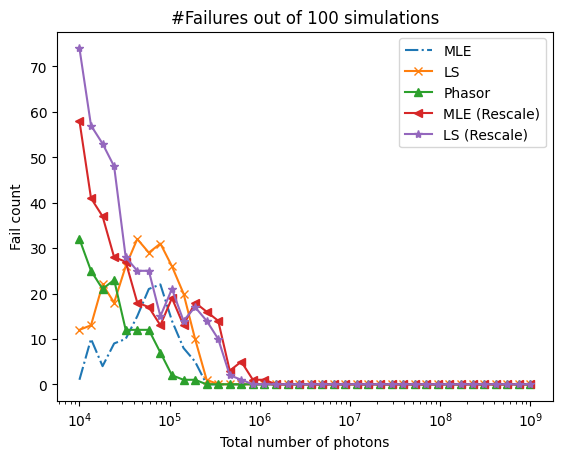

In [174]:
fail_count = np.zeros((len(fail_dict.keys()),40))
i=0
for k,v in fail_dict.items():
    fail = v.groupby(level=0).size() #count number of failures of each n_photon
    fail_count[i][:len(fail)] = fail
    i+=1
n_photon_arr = np.logspace(4,9,40).astype(int)

plt.figure()
plt.title('#Failures out of 100 simulations')
for i in range(5):
    plt.plot(n_photon_arr,fail_count[i],['-.','-x','-^','-<','-*'][i],label = ['MLE','LS','Phasor','MLE (Rescale)','LS (Rescale)'][i])
#plt.plot(n_photon_arr2,fail_count_fit,'x',label = 'MLE (w/ bg, no rescale)')
plt.xscale('log')
plt.xlabel('Total number of photons')
plt.ylabel('Fail count')
plt.legend()
plt.savefig('fig/fail_compare.pdf')


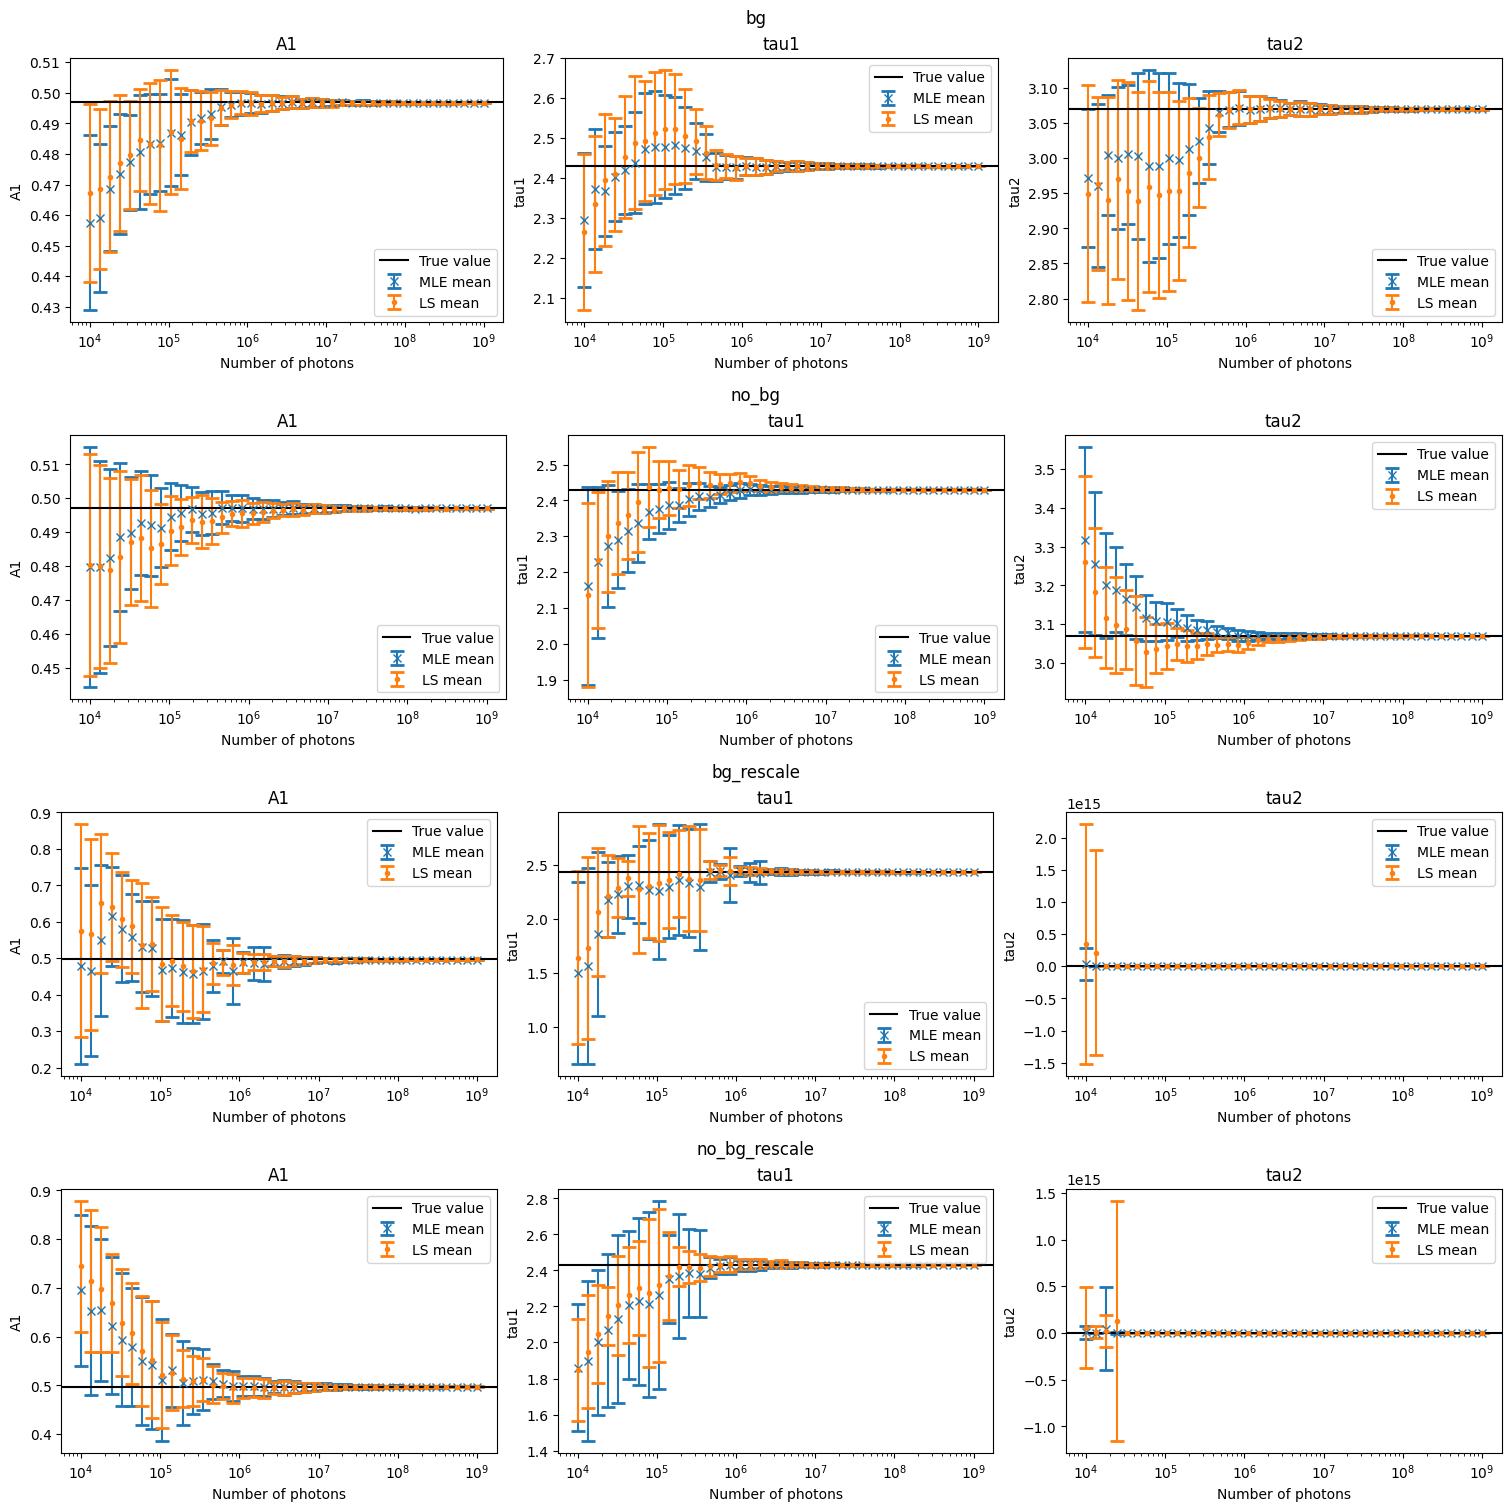

In [187]:
# Set up the subplots
fig = plt.figure( figsize=(15, 15))
big_axs = fig.subfigures(4,1)
true = [0.497,2.43,3.07]
mean_list = [df.groupby(level = 0).mean() for df in [df_mle,df_ls]]
std_list  = [df.groupby(level = 0).std() for df in [df_mle,df_ls]]
cases = ['bg','no_bg','bg_rescale','no_bg_rescale']
for j in range(4):
    case = cases[j]
    big_axs[j].suptitle(case)
    for i in range(3):
        axs = big_axs[j].add_subplot(1, 3,i+1 )
        col = ['A1','tau1','tau2'][i] #column name
        for k in range(2):
            axs.errorbar(n_photon_arr, mean_list[k][(case,col)], yerr=std_list[k][(case,col)], fmt=['x','.'][k], capthick=2,
                            capsize=5, label=['MLE mean','LS mean'][k])
        axs.axhline(y=true[i], color='k', linestyle='-', label='True value')
        axs.set_xscale('log')
        axs.set_xlabel('Number of photons')
        axs.set_ylabel(col)
        axs.set_title(col)
        axs.legend()


# Show the plot
plt.show()

In [182]:
col1,col2 = df_mle.columns.levels
mean_list = [[],[],[],[]] #4 lists for 4 cases, each contains 2  mle and ls
std_list = [[],[],[],[]] #
i=0
#remove failures and calculate mean
for col in col1:
    mean_list[i] = [df[col][df[col].success == True].groupby(level = 0).mean() for df in [df_mle,df_ls]]
    std_list[i] = [df[col][df[col].success == True].groupby(level = 0).std() for df in [df_mle,df_ls]]
    i+=1

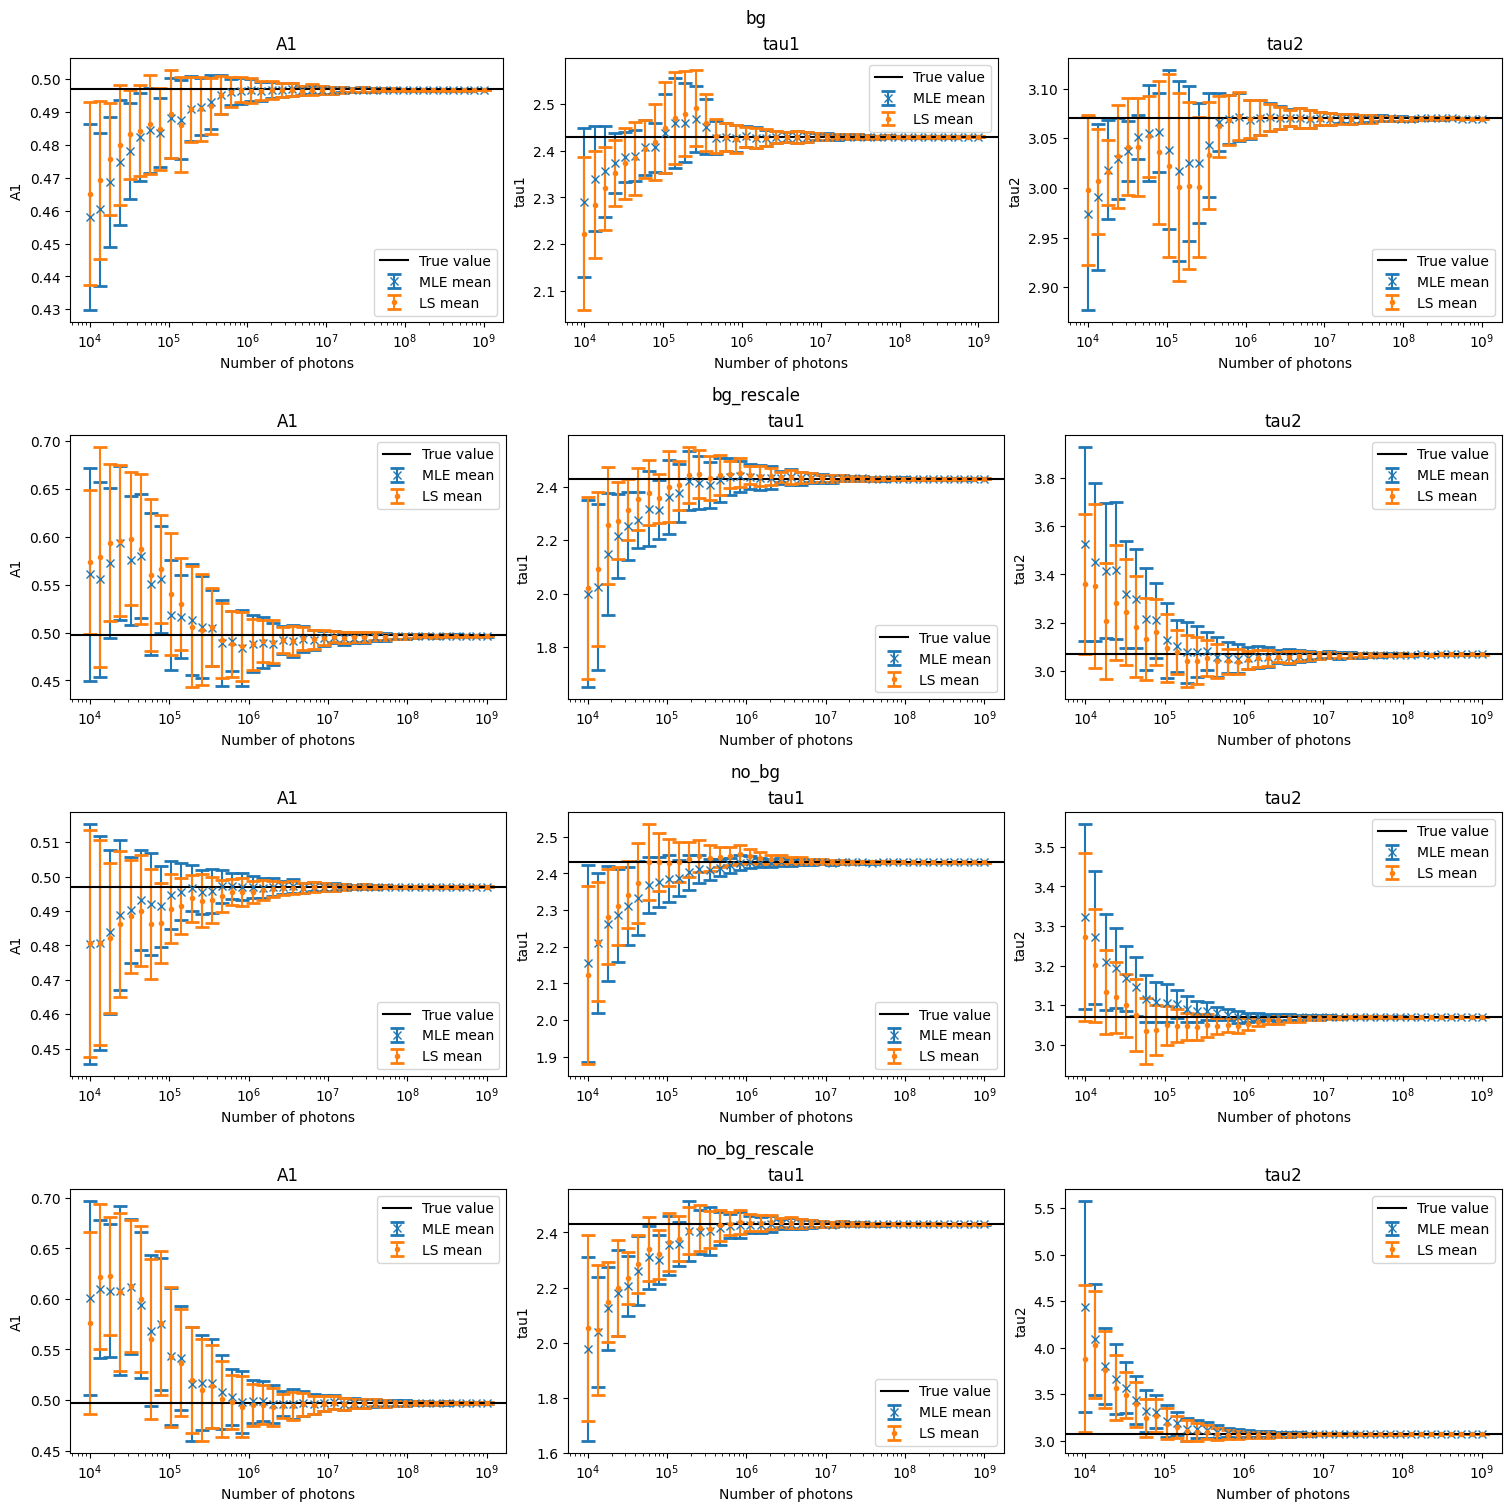

In [186]:
# Set up the subplots
fig = plt.figure( figsize=(15, 15))
big_axs = fig.subfigures(4,1)
true = [0.497,2.43,3.07]
cases = col1
for j in range(4):
    case = cases[j]
    big_axs[j].suptitle(case)
    for i in range(3):
        axs = big_axs[j].add_subplot(1, 3,i+1 )
        col = ['A1','tau1','tau2'][i] #column name
        for k in range(2):
            axs.errorbar(n_photon_arr, mean_list[j][k][col], yerr=std_list[j][k][col], fmt=['x','.'][k], capthick=2,
                            capsize=5, label=['MLE mean','LS mean'][k])
        axs.axhline(y=true[i], color='k', linestyle='-', label='True value')
        axs.set_xscale('log')
        axs.set_xlabel('Number of photons')
        axs.set_ylabel(col)
        axs.set_title(col)
        axs.legend()


# Show the plot
plt.show()


In [189]:
df_p

bg1                                        bg2                 \
      success nfev        A1      tau1      tau2 success nfev        A1   
0  0     True   14  0.515426  2.105530  3.252284    True   13  0.515604   
   1    False   37 -0.449818  2.335634  2.655182    True   17  0.497498   
   2     True   12  0.509820  2.171154  3.238636    True   22  0.539287   
   3     True    9  0.491061  2.483433  3.075866    True   14  0.503095   
   4     True   12  0.504766  2.294499  3.145251   False   34  0.495865   
...       ...  ...       ...       ...       ...     ...  ...       ...   
39 95    True    9  0.496486  2.401110  3.112849    True    8  0.496062   
   96    True   11  0.496489  2.401209  3.112690    True    8  0.495947   
   97    True   10  0.496577  2.398998  3.114393    True   10  0.496207   
   98    True    9  0.496479  2.401347  3.112631    True    8  0.496154   
   99    True   15  0.496509  2.400882  3.112852    True    8  0.495972   

                            no_bg                                     
           tau1      tau2 success nfev        A1      tau1      tau2  
0  0   2.095248  3.263083    True   14  0.516217  2.120904  3.223096  
   1   1.758466  3.789305   False   38  0.501352  2.776550  2.776563  
   2   1.658209  3.844301    True   12  0.510586  2.188310  3.207507  
   3   1.907761  3.654482    True   10  0.491329  2.521411  3.024575  
   4   2.737910  2.740818    True   10  0.505425  2.317395  3.108183  
...         ...       ...     ...  ...       ...       ...       ...  
39 95  2.421556  3.092256    True    8  0.496978  2.430354  3.069825  
   96  2.427302  3.086417    True    7  0.496980  2.430467  3.069652  
   97  2.416878  3.096376    True    7  0.497074  2.428042  3.071564  
   98  2.417044  3.096818    True    7  0.496971  2.430616  3.069582  
   99  2.426768  3.086786    True    7  0.497001  2.430111  3.069842  

[4000 rows x 15 columns]

### Phasor df

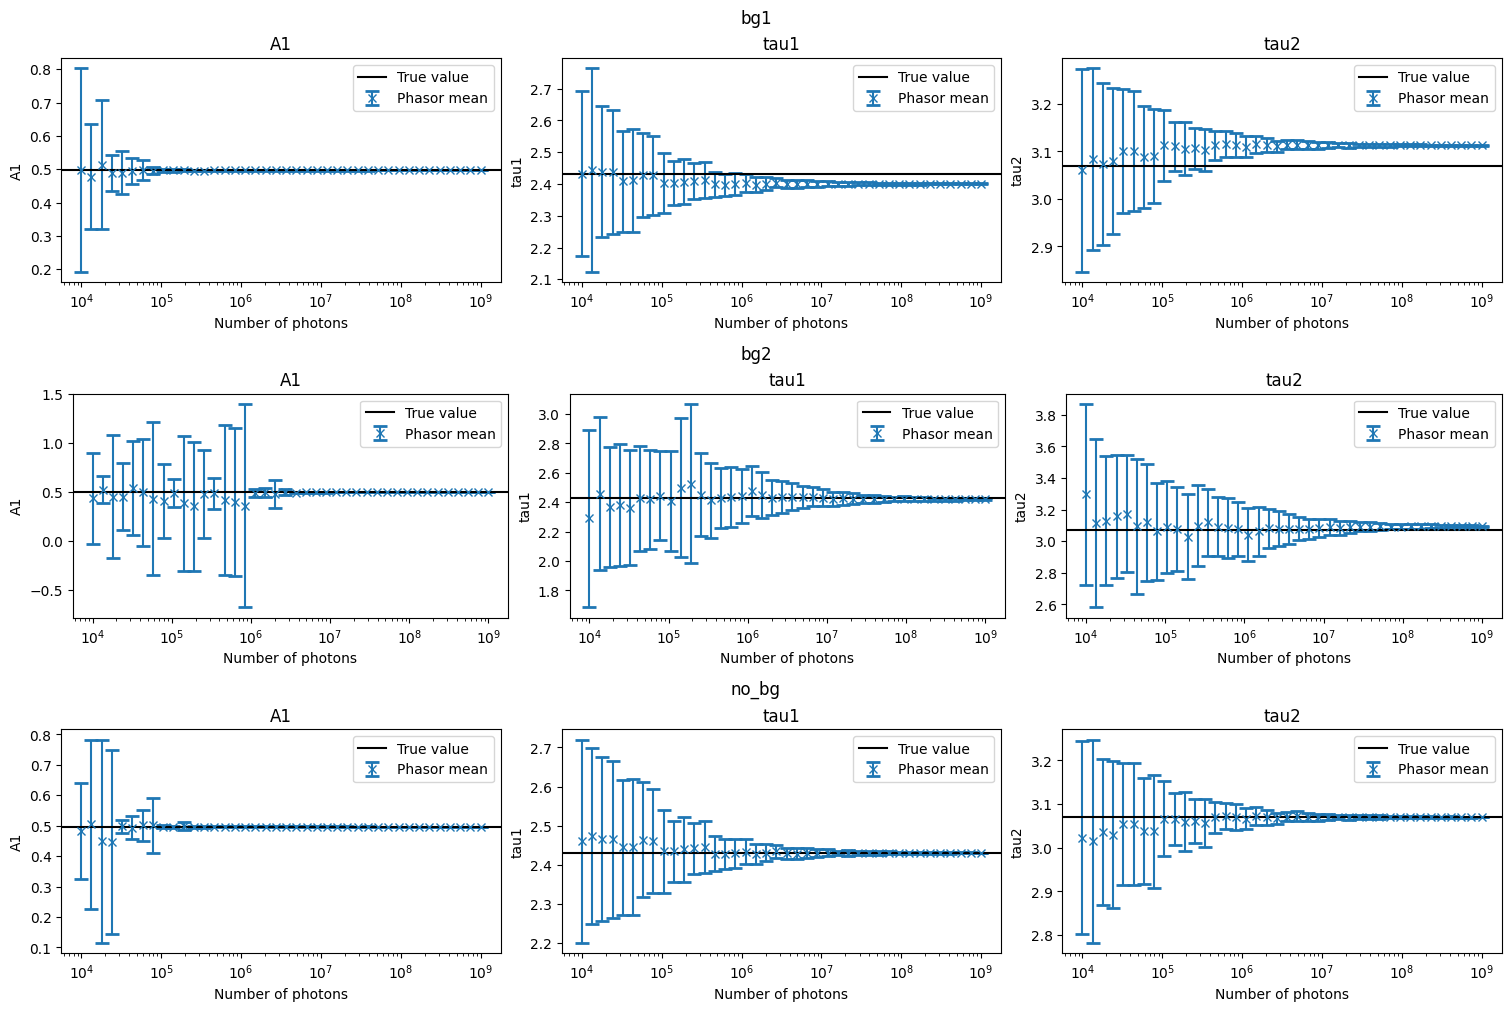

In [215]:
# Set up the subplots
fig = plt.figure( figsize=(15, 10))
big_axs = fig.subfigures(3,1)
true = [0.497,2.43,3.07]
mean_list_p = [df_p.groupby(level = 0).mean() ]
std_list_p = [df_p.groupby(level = 0).std() ]
cases = ['bg1','bg2','no_bg']
for j in range(3):
    case = cases[j]
    big_axs[j].suptitle(case)
    for i in range(3):
        axs = big_axs[j].add_subplot(1, 3,i+1 )
        col = ['A1','tau1','tau2'][i] #column name
        for k in range(1):
            axs.errorbar(n_photon_arr, mean_list_p[k][(case,col)], yerr=std_list_p[k][(case,col)], fmt=['x','.'][k], capthick=2,
                            capsize=5, label=['Phasor mean','LS mean'][k])
        axs.axhline(y=true[i], color='k', linestyle='-', label='True value')
        axs.set_xscale('log')
        axs.set_xlabel('Number of photons')
        axs.set_ylabel(col)
        axs.set_title(col)
        axs.legend()


# Show the plot
plt.show()

In [216]:
col1,col2 = df_p.columns.levels
mean_list_p = []
std_list_p =  [] 
i=0
#remove failures and calculate mean
for col in col1:
    mean_list_p.append(df_p[col][df_p[col].success == True].groupby(level = 0).mean()) 
    std_list_p.append(df_p[col][df_p[col].success == True].groupby(level = 0).std()) 
    i+=1

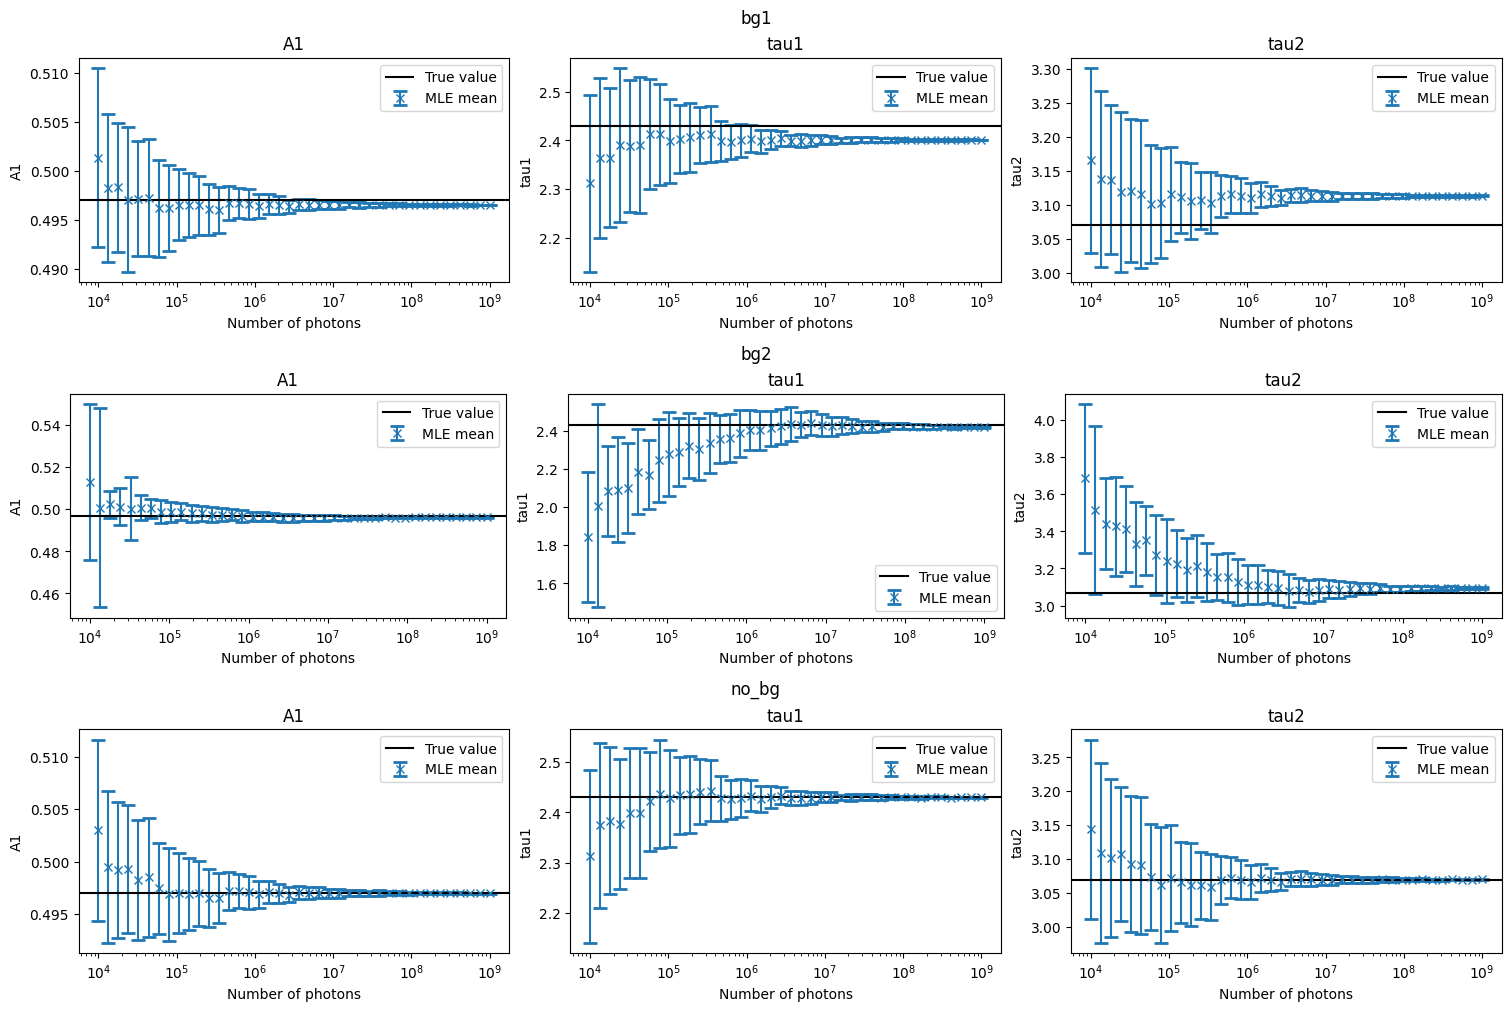

In [217]:
fig = plt.figure( figsize=(15, 10))
big_axs = fig.subfigures(3,1)
cases = ['bg1','bg2','no_bg']
for j in range(3):
    case = cases[j]
    big_axs[j].suptitle(case)
    for i in range(3):
        axs = big_axs[j].add_subplot(1, 3,i+1 )
        col = ['A1','tau1','tau2'][i] #column name
        for k in range(1):
            axs.errorbar(n_photon_arr, mean_list_p[j][col], yerr=std_list_p[j][col], fmt=['x','.'][k], capthick=2,
                            capsize=5, label=['MLE mean','LS mean'][k])
        axs.axhline(y=true[i], color='k', linestyle='-', label='True value')
        axs.set_xscale('log')
        axs.set_xlabel('Number of photons')
        axs.set_ylabel(col)
        axs.set_title(col)
        axs.legend()


# Show the plot
plt.show()

### No bg, no rescale for MLE, LS and Phasor, failures removed

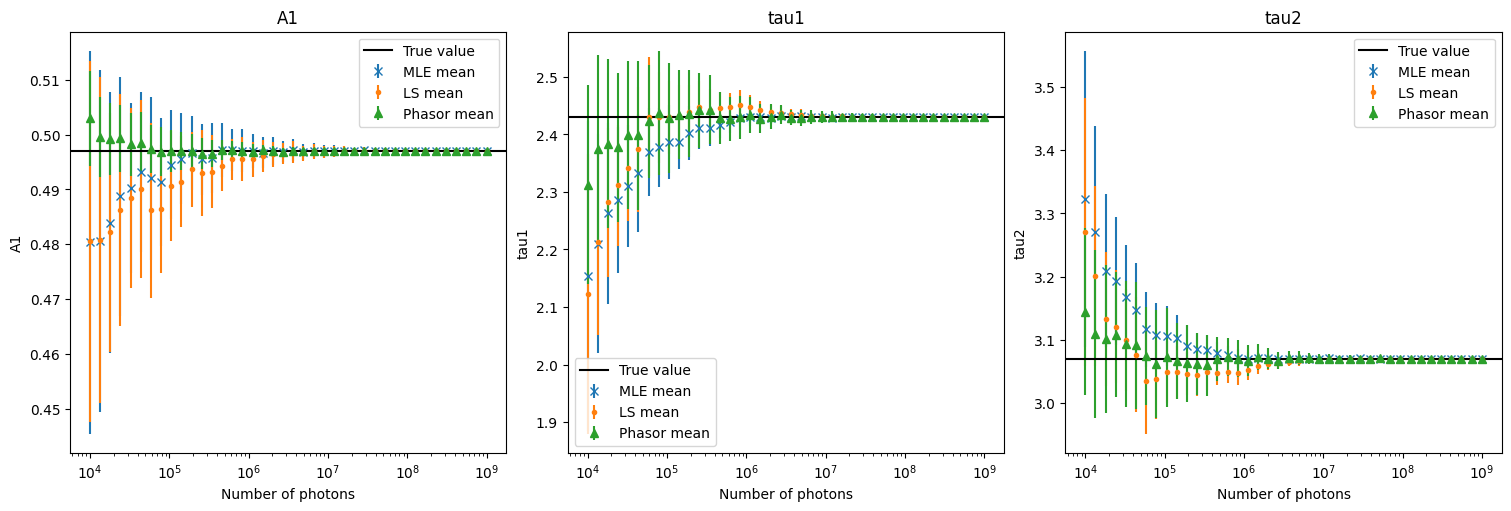

In [218]:
fig = plt.figure( figsize=(15, 5))
cases = ['no_bg']
mean_list = [df.no_bg[df.no_bg.success ==True].groupby(level=0).mean() for df in [df_mle,df_ls,df_p]]
std_list = [df.no_bg[df.no_bg.success ==True].groupby(level=0).std() for df in [df_mle,df_ls,df_p]]
for j in range(1):
    case = cases[j]
    for i in range(3):
        axs = fig.add_subplot(1, 3,i+1 )
        col = ['A1','tau1','tau2'][i] #column name
        for k in range(3):
            axs.errorbar(n_photon_arr, mean_list[k][col], yerr=std_list[k][col], fmt=['x','.','^'][k],
                         label=['MLE mean','LS mean','Phasor mean'][k])
        axs.axhline(y=true[i], color='k', linestyle='-', label='True value')
        axs.set_xscale('log')
        axs.set_xlabel('Number of photons')
        axs.set_ylabel(col)
        axs.set_title(col)
        axs.legend()


# Show the plot
plt.show()